# Artificial Neural Network




## Part 1 - Data Preprocessing

In [21]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [22]:
# Importing the dataset
data = pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [24]:
data.CustomerId.nunique()

10000

In [25]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [26]:
X = data.iloc[:, 3:13]  ### RowNumber, CustomerId, Surname are unique values and vulnarable for the dataset
y = data.iloc[:, 13]
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [27]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [28]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [29]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0


In [30]:
## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)


In [31]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [32]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Part 2 - Now let's make the ANN!

In [33]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense           #A dense layer is just a regular layer of neurons in a neural network.Each neuron recieves input from all the neurons in the previous layer, thus densely connected. The layer has a weight matrix W, a bias vector b, and the activations of previous layer a
from keras.layers import LeakyReLU,PReLU,ELU          #Activation functions
from keras.layers import Dropout        #Regularization parameter

Using TensorFlow backend.


In [34]:
# Initialising the ANN
classifier = Sequential()

In [51]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(input_dim = 11, kernel_initializer = 'he_uniform',activation='relu',units = 6))
      #11 input features connected to the input layer, initialization parameter, activation functions, first hidden layer consist 6 neurons
           #as in xtrain 11 features are there           #how weights are initialized
         ## always equal to the input features   
            
# Adding the second hidden layer
classifier.add(Dense( kernel_initializer = 'he_uniform',activation='relu',units = 6))
                                                                          # second hidden layer consist 6 neurons

# Adding the output layer
classifier.add(Dense( kernel_initializer = 'glorot_uniform', activation = 'sigmoid',units = 1))
                      #glorot_uniform ,    sigmoid activation only suitable in output layer, output layer consist 1 neurons 
                    #      initialization used in output layer                                     coz of binary classification problem

In [52]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 12        
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 7         
_________________________________________________________________
dense_7 (Dense)              (None, 6)                

C:\Users\hp\Anaconda3\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


In [49]:
#### With he_uniform and he_normal , the ReLU activation function works well 
### while glorot_uniform works well with sigmoid activation function which is used in output layer

In [36]:
# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])
                 #optimizer             loss function                  performance metrics
                                        #binary_crossentropy best for binary classification problem

In [37]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, nb_epoch = 100)
                                                             ## batch size used for minimize computation power as it will convert n data points into k batches

Instructions for updating:
Use tf.cast instead.


C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 5359 samples, validate on 2641 samples
Epoch 1/100
5359/5359 [==============================] - 1s 199us/step - loss: 0.6826 - accuracy: 0.6303 - val_loss: 0.5503 - val_accuracy: 0.7948
Epoch 2/100
5359/5359 [==============================] - 1s 112us/step - loss: 0.5108 - accuracy: 0.8076 - val_loss: 0.4884 - val_accuracy: 0.8080
Epoch 3/100
5359/5359 [==============================] - 1s 107us/step - loss: 0.4634 - accuracy: 0.8158 - val_loss: 0.4576 - val_accuracy: 0.8179
Epoch 4/100
5359/5359 [==============================] - 1s 110us/step - loss: 0.4355 - accuracy: 0.8233 - val_loss: 0.4393 - val_accuracy: 0.8201
Epoch 5/100
5359/5359 [==============================] - 1s 108us/step - loss: 0.4168 - accuracy: 0.8319 - val_loss: 0.4258 - val_accuracy: 0.8277
Epoch 6/100
5359/5359 [==============================] - 1s 108us/step - loss: 0.4019 - accuracy: 0.8373 - val_loss: 0.4145 - val_accuracy: 0.8281
Epoch 7/100
5359/5359 [==============================] - 1s 109us/step

5359/5359 [==============================] - 1s 132us/step - loss: 0.3344 - accuracy: 0.8647 - val_loss: 0.3600 - val_accuracy: 0.8542
Epoch 57/100
5359/5359 [==============================] - 1s 111us/step - loss: 0.3344 - accuracy: 0.8643 - val_loss: 0.3606 - val_accuracy: 0.8519
Epoch 58/100
5359/5359 [==============================] - 1s 114us/step - loss: 0.3344 - accuracy: 0.8630 - val_loss: 0.3601 - val_accuracy: 0.8523
Epoch 59/100
5359/5359 [==============================] - 1s 121us/step - loss: 0.3345 - accuracy: 0.8634 - val_loss: 0.3595 - val_accuracy: 0.8531
Epoch 60/100
5359/5359 [==============================] - 1s 160us/step - loss: 0.3343 - accuracy: 0.8643 - val_loss: 0.3595 - val_accuracy: 0.8546
Epoch 61/100
5359/5359 [==============================] - 1s 148us/step - loss: 0.3341 - accuracy: 0.8638 - val_loss: 0.3591 - val_accuracy: 0.8538
Epoch 62/100
5359/5359 [==============================] - 1s 113us/step - loss: 0.3341 - accuracy: 0.8636 - val_loss: 0.3595 

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


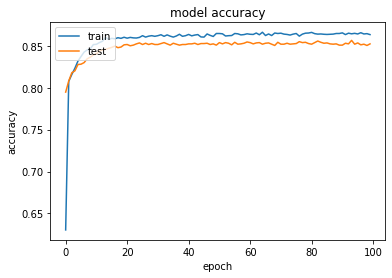

In [40]:
# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

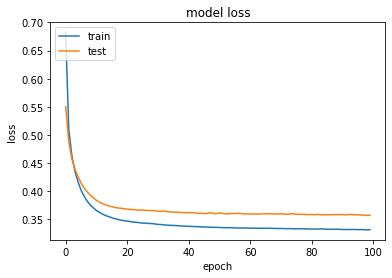

In [41]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Part 3 - Making the predictions and evaluating the model

In [53]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [46]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1517,   78],
       [ 201,  204]], dtype=int64)

In [45]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.8605

In [54]:
### we get good training and testing accuracy so we don't make model overfitted.

## Add dropout and make new classifier with multiple permutaion combination to check accuracy

In [55]:
# Initialising the ANN
classifier1 = Sequential()



# Adding the input layer and the first hidden layer
classifier1.add(Dense(input_dim = 11, kernel_initializer = 'he_uniform',activation='relu',units = 8))
classifier1.add(Dropout(0.3))      #add random dropout rate in layers as a regularization parameters    
            
# Adding the second hidden layer
classifier1.add(Dense( kernel_initializer = 'he_normal',activation='relu',units = 7))
classifier1.add(Dropout(0.4)) 

# Adding the third hidden layer
classifier1.add(Dense( kernel_initializer = 'he_normal',activation='relu',units = 6))
classifier1.add(Dropout(0.2)) 
                                                                         

# Adding the output layer
classifier1.add(Dense( kernel_initializer = 'glorot_uniform', activation = 'sigmoid',units = 1))
                                                  

In [56]:
classifier1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 8)                 96        
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_17 (Dense)             (None, 7)                 63        
_________________________________________________________________
dropout_2 (Dropout)          (None, 7)                 0         
_________________________________________________________________
dense_18 (Dense)             (None, 6)                 48        
_________________________________________________________________
dropout_3 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_19 (Dense)             (None, 1)                

In [57]:
# Compiling the ANN
classifier1.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
                 #optimizer             loss function                  performance metrics
                                        #binary_crossentropy best for binary classification problem

In [58]:
# Fitting the ANN to the Training set
model_history=classifier1.fit(X_train, y_train,validation_split=0.33, batch_size = 10, nb_epoch = 100)
                                                             ## batch size used for minimize computation power as it will convert n data points into k batches

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 5359 samples, validate on 2641 samples
Epoch 1/100
5359/5359 [==============================] - 1s 245us/step - loss: 0.7766 - accuracy: 0.6621 - val_loss: 0.5294 - val_accuracy: 0.7955
Epoch 2/100
5359/5359 [==============================] - 1s 215us/step - loss: 0.5600 - accuracy: 0.7761 - val_loss: 0.5068 - val_accuracy: 0.7955
Epoch 3/100
5359/5359 [==============================] - 1s 207us/step - loss: 0.5222 - accuracy: 0.7873 - val_loss: 0.4961 - val_accuracy: 0.7955
Epoch 4/100
5359/5359 [==============================] - 1s 201us/step - loss: 0.5054 - accuracy: 0.7936 - val_loss: 0.4832 - val_accuracy: 0.7955
Epoch 5/100
5359/5359 [==============================] - 1s 234us/step - loss: 0.5000 - accuracy: 0.7953 - val_loss: 0.4748 - val_accuracy: 0.7955
Epoch 6/100
5359/5359 [==============================] - 1s 189us/step - loss: 0.4894 - accuracy: 0.7964 - val_loss: 0.4638 - val_accuracy: 0.7955
Epoch 7/100
5359/5359 [==============================] - 1s 176us/step

5359/5359 [==============================] - 1s 139us/step - loss: 0.4018 - accuracy: 0.8315 - val_loss: 0.3882 - val_accuracy: 0.8243
Epoch 57/100
5359/5359 [==============================] - 1s 159us/step - loss: 0.3909 - accuracy: 0.8397 - val_loss: 0.3870 - val_accuracy: 0.8247
Epoch 58/100
5359/5359 [==============================] - 1s 187us/step - loss: 0.4023 - accuracy: 0.8345 - val_loss: 0.3867 - val_accuracy: 0.8247
Epoch 59/100
5359/5359 [==============================] - 1s 145us/step - loss: 0.3973 - accuracy: 0.8367 - val_loss: 0.3875 - val_accuracy: 0.8213
Epoch 60/100
5359/5359 [==============================] - 1s 146us/step - loss: 0.4005 - accuracy: 0.8356 - val_loss: 0.3931 - val_accuracy: 0.8171
Epoch 61/100
5359/5359 [==============================] - 1s 161us/step - loss: 0.3957 - accuracy: 0.8369 - val_loss: 0.3818 - val_accuracy: 0.8311
Epoch 62/100
5359/5359 [==============================] - 1s 143us/step - loss: 0.3930 - accuracy: 0.8393 - val_loss: 0.3770 

In [59]:
## After applying dropout and add 1 more hidden layer doesn't increase my accuracy so previous model is perfecgt for our problem